In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [ ]:
data = pd.read_csv('/content/bottle.csv')


In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0.0,10.50,33.440,NaN,25.649,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8.0,10.46,33.440,NaN,25.656,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10.0,10.46,33.437,NaN,25.654,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19.0,10.45,33.420,NaN,25.643,NaN,...,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20.0,10.45,33.421,NaN,25.643,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(116181, 74)

In [ ]:
data.isnull().sum()


Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      1
                        ...  
TA1                    116181
TA2                    116181
pH2                    116181
pH1                    116181
DIC Quality Comment    116181
Length: 74, dtype: int64

In [ ]:
# Since the relationship between salinity and temperature will be examined, we assign these two data to a separate variable.
salt_degree = data[['Salnty', 'T_degC']]

In [ ]:
salt_degree.head()

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [ ]:
salt_degree.shape

(116181, 2)

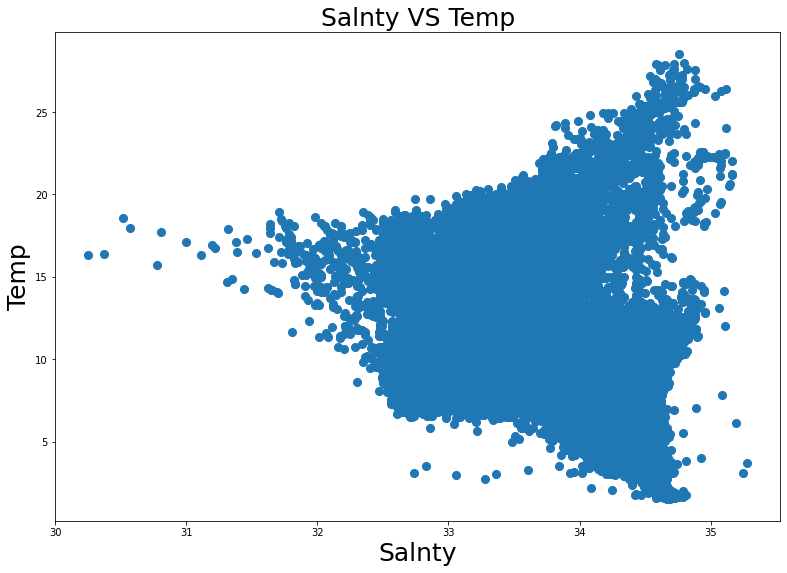

In [ ]:
#we touch the scatter graph to observe the correlation between the two features
plt.figure(figsize = (13,9))
plt.scatter(salt_degree['Salnty'], salt_degree['T_degC'],s=65 )
plt.xlabel('Salnty' , fontsize=25)
plt.ylabel('Temp', fontsize=25)
plt.title('Salnty VS Temp', fontsize=25)
plt.show()

In [ ]:
# We get 800 data to speed up the analysis of data and see it more meaningfully.
new_salt_degree = salt_degree[:][:800]
len(new_salt_degree)


800

The code is attempting to slice the list "salt_degree" to create a new list called "new_salt_degree" that contains only the first 800 elements of the original list. The first slice operator (:) means to include all elements in the list, and the second slice operator (:800) means to include only the first 800 elements of the list. This will result in a new list that is a copy of the first 750 elements of the original list "salt_degree".

In [ ]:
# We detect and clean the Nan values in our data
new_salt_degree['Salnty'].isnull().sum()
new_salt_degree['T_degC'].isnull().sum()

2

In [ ]:
new_salt_degree = new_salt_degree.dropna(axis = 0, how = 'any')
new_salt_degree.isna().sum()

Salnty    0
T_degC    0
dtype: int64

In [ ]:
# We delete duplicate values in our data
new_salt_degree = new_salt_degree.drop_duplicates(subset = ['Salnty', 'T_degC'])
len(new_salt_degree)

767

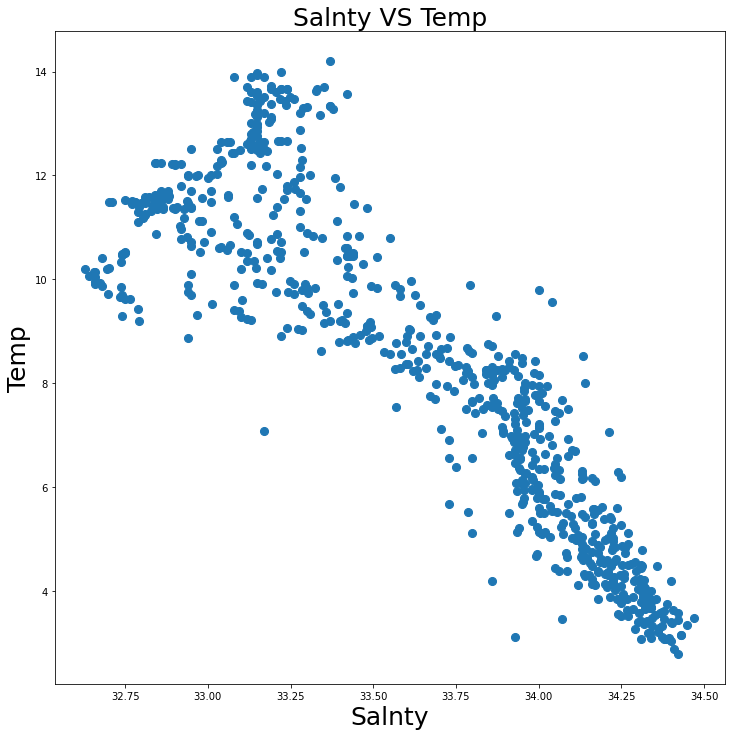

In [ ]:
#we touch the scatter graph to observe the correlation between the two features
plt.figure(figsize = (12,12))
plt.scatter(new_salt_degree['Salnty'], new_salt_degree['T_degC'],s=65 )
plt.xlabel('Salnty' , fontsize=25)
plt.ylabel('Temp', fontsize=25)
plt.title('Salnty VS Temp', fontsize=25)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# We keep column values in two variables named Tmp and Slt
Slt = new_salt_degree.iloc[:,0:1].values
Tmp = new_salt_degree.iloc[:, -1].values

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(Slt,Tmp)

LinearRegression()

This code is using the pandas method "iloc" to select a subset of rows and columns from the dataframe "new_salt_degree". The first slice operator (:,) means to include all rows in the dataframe, and the second slice operator (0:1) means to include only the first column. The ".values" attribute is used to convert the resulting dataframe into a numpy array. So, this code is selecting all rows and only the first column of the dataframe "new_salt_degree" and storing the result as a numpy array in the variable "Slt".

In [ ]:
print(Slt)

[[33.44 ]
 [33.44 ]
 [33.437]
 [33.42 ]
 [33.421]
 [33.431]
 [33.44 ]
 [33.424]
 [33.42 ]
 [33.494]
 [33.51 ]
 [33.58 ]
 [33.64 ]
 [33.689]
 [33.847]
 [33.86 ]
 [33.876]
 [33.926]
 [33.98 ]
 [33.99 ]
 [34.04 ]
 [34.056]
 [34.113]
 [34.16 ]
 [34.161]
 [34.21 ]
 [34.261]
 [34.31 ]
 [32.95 ]
 [32.94 ]
 [32.939]
 [32.95 ]
 [33.013]
 [33.24 ]
 [33.272]
 [33.46 ]
 [33.488]
 [33.6  ]
 [33.631]
 [33.745]
 [33.8  ]
 [33.833]
 [33.93 ]
 [33.939]
 [33.943]
 [33.95 ]
 [33.957]
 [34.   ]
 [34.016]
 [34.101]
 [34.16 ]
 [34.188]
 [34.259]
 [34.319]
 [34.34 ]
 [34.354]
 [34.378]
 [34.403]
 [34.429]
 [34.43 ]
 [32.63 ]
 [32.66 ]
 [32.66 ]
 [32.66 ]
 [32.673]
 [32.68 ]
 [32.75 ]
 [32.736]
 [32.66 ]
 [32.74 ]
 [32.765]
 [33.12 ]
 [33.132]
 [33.398]
 [33.605]
 [33.82 ]
 [33.844]
 [33.926]
 [33.93 ]
 [33.941]
 [34.041]
 [34.11 ]
 [34.113]
 [34.135]
 [34.151]
 [34.16 ]
 [34.169]
 [34.252]
 [34.336]
 [34.421]
 [34.45 ]
 [32.68 ]
 [32.7  ]
 [32.694]
 [32.66 ]
 [32.657]
 [32.641]
 [32.699]
 [32.79 ]
 [32.967]


In [ ]:
print(Tmp)

[10.5  10.46 10.46 10.45 10.45 10.45 10.45 10.24 10.06  9.86  9.83  9.67
  9.5   9.32  8.76  8.71  8.53  8.26  7.96  7.77  6.8   6.55  5.78  5.3
  5.29  5.01  4.72  4.44 10.1   9.89  9.75  9.69  9.52  9.06  9.04  8.92
  8.83  8.37  8.26  7.85  7.64  7.5   6.98  6.85  6.32  6.05  5.95  5.6
  5.5   5.02  4.74  4.62  4.33  4.08  3.99  3.85  3.62  3.38  3.15  3.14
 10.2  10.05  9.95  9.94  9.92  9.87  9.62  9.66  9.9   9.65  9.62  9.23
  9.21  8.79  8.37  7.71  7.58  6.93  6.47  6.37  5.54  5.02  4.97  4.59
  4.31  4.14  4.11  3.89  3.66  3.43  3.35 10.4  10.22 10.2  10.14 10.14
 10.07  9.72  9.42  9.32  9.27  9.02  8.6   8.56  8.32  8.18  7.71  7.16
  7.08  6.61  6.38  5.79  5.14  5.1   4.65  4.31  4.21  4.07  3.83  3.59
  3.39 10.5  10.52 10.51 10.48 10.47 10.34  9.85  9.7   9.29  9.2   9.35
  8.28  8.24  7.95  7.5   7.42  6.98  6.94  6.54  5.86  5.77  5.3   4.83
  4.36  4.1  11.6  11.69 11.66 11.64 11.64 11.64 11.61 11.36 11.18 10.2
  9.9   8.83  8.29  8.11  7.65  6.98  6.72  6.54  5.96

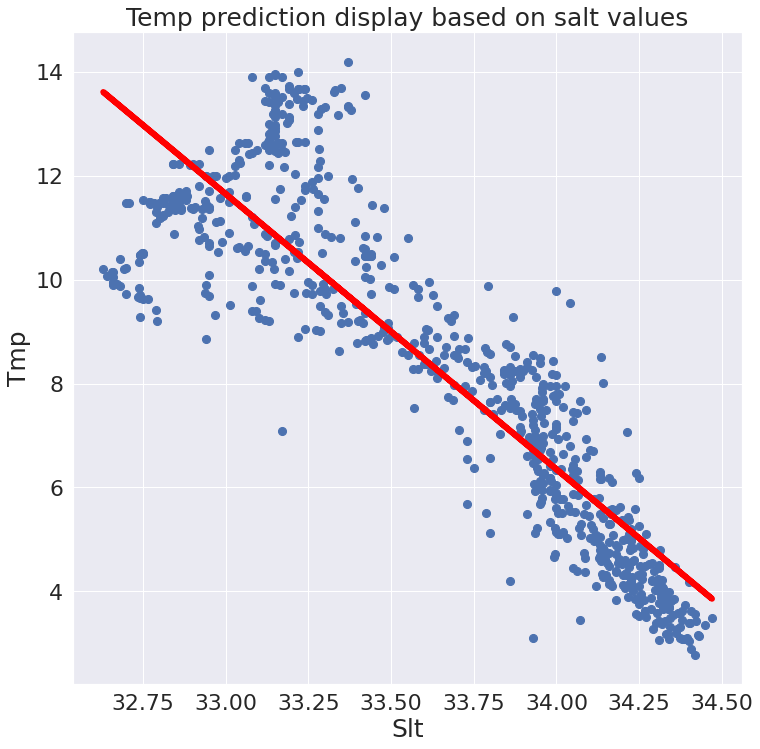

In [ ]:
# We show linear variation in scatter graph
sns.set(font_scale=2)
plt.figure(figsize=(12,12))
plt.scatter(Slt,Tmp,s=65 )
plt.plot(Slt,lin_reg.predict(Slt) , color='red',linewidth= '6')
plt.xlabel('Slt',fontsize=25)
plt.ylabel('Tmp',fontsize=25)
plt.title('Temp prediction display based on salt values', fontsize = 25)
plt.show()

In [ ]:
# We make forecasts of weather temperature based on salt value
degree_lin = lin_reg.predict([[33]])
print(degree_lin)

[11.65239757]


In [ ]:
# We determine the accuracy of our predictions with r_square
Tmp_head_lin = lin_reg.predict(Slt)
score_1 = metrics.r2_score(Tmp,Tmp_head_lin)

score_2 = metrics.mean_absolute_error(Tmp, Tmp_head_lin)

print("R square value : ", score_1)

print("Mean absolute error : ", score_2)

R square value :  0.7904743532535009
Mean absolute error :  1.1101630926543828
